# Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
import warnings
warnings.filterwarnings('ignore')

# Clean Code
## Function and Results

# 01 Data import, Features name cleaning and first exploration

In [80]:
#Function to clean the data
def DATA_FRAME_CLEAN(data_frame_input):
    #Print size of dataframe
    print('The size for this data frame is: ', data_frame_input.shape)
    
    #Standarize column names
    cols = [col_name.upper().replace(' ', '_') for col_name in data_frame_input.columns]
    data_frame_input.columns = cols
    
    #Clean Variables
    #Fix weigth
    data_frame_input['WEIGHT'] = data_frame_input['WEIGHT'].str.rstrip('lbs').astype(int)
    #Fix heigth
    data_frame_input['HEIGHT'] = data_frame_input['HEIGHT'].str.replace('\'', '.').str.replace('"', '').astype(float)
    
    data_frame_input['IR'] = data_frame_input['IR'].str.replace('★', '').astype(float)
    data_frame_input['W/F'] = data_frame_input['W/F'].str.replace('★', '').astype(float)
    data_frame_input['SM'] = data_frame_input['SM'].str.replace('★', '').astype(float)
    
    #Fix Money related variables
    ## replace the "€" symbol with an empty string and convert to numeric
    data_frame_input['VALUE'] = data_frame_input['VALUE'].str.replace('€', '').str.rstrip('K').str.rstrip('M').astype(float)
    ## multiply the numeric values by 1 million or 1 thousand, depending on whether the value represents millions or thousands of euros
    data_frame_input['VALUE'] = data_frame_input['VALUE'].apply(
        lambda x: float(x[:-1]) * 1000 if isinstance(x, str) and 'K' in x
        else float(x[:-1]) * 1000000 if isinstance(x, str) and 'M' in x
        else float(x) if pd.notna(x)
        else np.nan
    )
    
    #WAGE
    data_frame_input['WAGE'] = data_frame_input['WAGE'].str.replace('€', '').str.rstrip('K').str.rstrip('M').astype(float)
    data_frame_input['WAGE'] = data_frame_input['WAGE'].apply(
        lambda x: float(x[:-1]) * 1000 if isinstance(x, str) and 'K' in x
        else float(x[:-1]) * 1000000 if isinstance(x, str) and 'M' in x
        else float(x) if pd.notna(x)
        else np.nan
    )
    
    #RELEASE_CLAUSE
    data_frame_input['RELEASE_CLAUSE'] = data_frame_input['RELEASE_CLAUSE'].str.replace('€', '').str.rstrip('K').str.rstrip('M').astype(float)
    data_frame_input['RELEASE_CLAUSE'] = data_frame_input['RELEASE_CLAUSE'].apply(
        lambda x: float(x[:-1]) * 1000 if isinstance(x, str) and 'K' in x
        else float(x[:-1]) * 1000000 if isinstance(x, str) and 'M' in x
        else float(x) if pd.notna(x)
        else np.nan
    )
    
    #Fixed values with a + as a , separator
    cols_to_replace = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']
    #Some values contains a -
    #data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].str.replace('-'', '').str.replace('"', '')
    data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].apply(lambda x: x.str.replace('+', '.'))

    #Convert HITS to numeric
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'])

    
    #Clean nulls
    #Select numeric columns
    df_numeric=data_frame_input.select_dtypes(include=["float", "int"]) 
    null_columns = df_numeric.columns[df_numeric.isna().sum() != 0].tolist()
    print("\n\n\nNumerical columns that contains null values: \n ",null_columns,"\n\n\n")
    #Put 0 in those which have nulls.
    #for  Column_to_change in null_columns:
        #df_numeric[Column_to_change] = df_numeric[Column_to_change].fillna(0) 
    
    #Select Object Variables
    df_object=data_frame_input.select_dtypes(include=[object]) 
    null_columns = df_object.columns[df_object.isna().sum() != 0].tolist()
    print("Categorical columns that contains null values: \n ",null_columns, "\n nulls have been replaced with Unkown label\n\n\n")
    #Put Unkwon in those which have nulls.
    for  Column_to_change in null_columns:
        df_object[Column_to_change] = df_object[Column_to_change].fillna('Unknown') 
    
    #Merge both branches
    data_frame_input=pd.concat([df_numeric,df_object],axis=1)
    #print(data_frame_input.columns)
    
    #Change EFFECTIVE_TO_DATE to date type
    #data_frame_input['EFFECTIVE_TO_DATE'] = pd.to_datetime(data_frame_input['EFFECTIVE_TO_DATE'])
    
    #Rename columns
    data_frame_input = data_frame_input.rename(columns={'OVA': 'OVERALL', 'BOV': 'BEST_OVERALL','LS': 'LEFT_STRIKER','ST':'LEFT_STRIKER',
                           'RS':'RIGHT_STRIKER','LW':'LEFT_WING','LF':'LEFT_FORWARD','CF':'CENTRAL_FORWARD','RF':'RIGHT_FORWARD',
                            'RW':'RIGHT_WING','LAM':'LEFT_ATTACKING_MIDFIELDER','CAM':'CENTRAL_ATTACKING_MIDFILEDER','RAM':'RIGHT_ATTACKING_MIDFIELDER',
                           'LM':'LEFT_MIDFIELDER','LCM':'LEFT_CENTRAL_MIDFIELDER','CM':'CENTRAL_MIDFIELDER','RCM':'RIGHT_CENTRAL_MIDFIELDER','RM':'RIGHT_MIDFIELDER',
                           'LWB':'LEFT_WING_BACK','LDM':'LEFT_DEFFENSIVE_MIDFIELDER','CDM':'CENTRAL_DEFENSIVE_MIDFIELDER','RDM':'RIGHT_DEFENSIVE_MIDFIELDER',
                           'RWB':'RIGHT_WING_BACK','LB':'LEFT_BACK','LCB':'LEFT_CENTRAL_BACK','CB':'CENTRAL_BACK','RCB':'RIGHT_CENTRAL_BACK','RB':'RIGHT_BACK',
                           'GK':'GOAL_KEEPER','BP':'BEST_POSITION','FK_ACCURACY':'FREE_KICK_ACCURACY','A/W':'ATTACKING_WORK_RATE','D/W':'DEFENSIVE_WORK_RATE','SM':'SKILL_MOVES','W/F':'WEEK_FOOT_ABILITY','SHO':'SHOOTING',
                           'POT':'POTENTIAL'})
    
    #Assign to ouput
    data_frame_output=data_frame_input
    
    #Print info for the dataframe
    print('\n\n\nDescription of output data frame \n')
    data_frame_output.info(
    )
    return data_frame_output

In [81]:
#Here I use the function created to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./fifa21_male2.csv')
#data_frame_input.shape
df_cleaned=DATA_FRAME_CLEAN(data_frame_input)
df_cleaned.sample(10)

The size for this data frame is:  (17125, 107)



Numerical columns that contains null values: 
  ['VOLLEYS', 'CURVE', 'AGILITY', 'BALANCE', 'JUMPING', 'INTERCEPTIONS', 'POSITIONING', 'VISION', 'COMPOSURE', 'SLIDING_TACKLE'] 



Categorical columns that contains null values: 
  ['CLUB', 'POSITION', 'CLUB_LOGO', 'JOINED', 'LOAN_DATE_END', 'A/W', 'D/W'] 
 nulls have been replaced with Unkown label






Description of output data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to GENDER
dtypes: float64(17), int32(1), int64(45), object(44)
memory usage: 13.9+ MB


,ID,AGE,OVERALL,BEST_OVERALL,POTENTIAL,HEIGHT,WEIGHT,GROWTH,VALUE,WAGE,RELEASE_CLAUSE,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FREE_KICK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,WEEK_FOOT_ABILITY,SKILL_MOVES,IR,PAC,SHOOTING,PAS,DRI,DEF,PHY,NAME,NATIONALITY,CLUB,BEST_POSITION,POSITION,PLAYER_PHOTO,CLUB_LOGO,FLAG_PHOTO,TEAM_&_CONTRACT,FOOT,JOINED,LOAN_DATE_END,CONTRACT,ATTACKING_WORK_RATE,DEFENSIVE_WORK_RATE,HITS,LEFT_STRIKER,LEFT_STRIKER,RIGHT_STRIKER,LEFT_WING,LEFT_FORWARD,CENTRAL_FORWARD,RIGHT_FORWARD,RIGHT_WING,LEFT_ATTACKING_MIDFIELDER,CENTRAL_ATTACKING_MIDFILEDER,RIGHT_ATTACKING_MIDFIELDER,LEFT_MIDFIELDER,LEFT_CENTRAL_MIDFIELDER,CENTRAL_MIDFIELDER,RIGHT_CENTRAL_MIDFIELDER,RIGHT_MIDFIELDER,LEFT_WING_BACK,LEFT_DEFFENSIVE_MIDFIELDER,CENTRAL_DEFENSIVE_MIDFIELDER,RIGHT_DEFENSIVE_MIDFIELDER,RIGHT_WING_BACK,LEFT_BACK,LEFT_CENTRAL_BACK,CENTRAL_BACK,RIGHT_CENTRAL_BACK,RIGHT_BACK,GOAL_KEEPER,GENDER
13846,247014,20,63,65,75,6.20,181,12,600.0,1.0,1.0,214,38,25,61,65,25.0,208,43,36.0,29,48,52,298,64,71,58.0,56,49.0,265,34,73.0,63,74,21,236,70,60.0,28.0,39.0,39,44.0,183,58,64,61.0,61,11,13,13,10,14,1465,323,3.0,2.0,1.0,68,27,49,48,61,70,A. Keita,United States,Columbus Crew SC,CB,CB,https://cdn.sofifa.com/players/247/014/20_120.png,https://cdn.sofifa.com/teams/687/light_60.png,https://cdn.sofifa.com/flags/us.png,Columbus Crew SC 2019 ~ 2022,Left,"Jan 22, 2019",Unknown,2019 ~ 2022,Medium,Medium,17,45.2,45.2,45.2,46.0,45.0,45.0,45.0,46.0,47.2,47.2,47.2,49.2,50.2,50.2,50.2,49.2,58.2,59.2,59.2,59.2,58.2,59.2,63.2,63.2,63.2,59.2,17.2,Male
2821,192598,30,79,79,79,5.11,170,0,12.0,32.0,19.2,370,67,80,72,75,76.0,379,78,76.0,80,66,79,412,87,80,83.0,75,87.0,402,86,83.0,80,81,72,364,68,56.0,77.0,78.0,85,76.0,123,43,45,35.0,47,9,16,7,8,7,2097,441,4.0,4.0,2.0,83,80,73,79,48,78,Ai Kesen,China PR,China PR,ST,ST,https://cdn.sofifa.com/players/192/598/20_120.png,https://cdn.sofifa.com/teams/1413/light_60.png,https://cdn.sofifa.com/flags/cn.png,Guangzhou Evergrande Taobao FC 2019 ~ 2022,Right,"Jul 9, 2019",Unknown,Guangzhou Evergrande Taobao FC 2019 ~ 2022,High,High,66,79.0,79.0,79.0,77.0,78.0,78.0,78.0,77.0,77.2,77.2,77.2,77.2,73.2,73.2,73.2,77.2,64.2,64.2,64.2,64.2,64.2,62.2,59.2,59.2,59.2,62.2,17.2,Male
13438,245628,21,60,62,70,6.20,176,10,300.0,2.0,690.0,201,35,27,57,50,32.0,199,40,32.0,31,45,51,249,48,53,49.0,54,45.0,259,38,65.0,61,67,28,220,60,62.0,24.0,36.0,38,46.0,187,58,65,64.0,51,9,10,11,12,9,1366,293,3.0,2.0,1.0,51,30,42,45,61,64,A. Abqar,Morocco,Deportivo Alavés,CB,CB,https://cdn.sofifa.com/players/245/628/20_120.png,https://cdn.sofifa.com/teams/463/light_60.png,https://cdn.sofifa.com/flags/ma.png,Deportivo Alavés 2020 ~ 2023,Right,"Sep 9, 2020",Unknown,2020 ~ 2023,Low,Medium,7,42.2,42.2,42.2,41.0,41.0,41.0,41.0,41.0,42.2,42.2,42.2,43.2,46.2,46.2,46.2,43.2,54.2,56.2,56.2,56.2,54.2,56.2,60.2,60.2,60.2,56.2,15.2,Male
11375,239397,23,66,67,75,5.70,154,9,1.0,5.0,1.8,266,53,60,42,59,52.0,265,71,45.0,37,50,62,424,93,92,88.0,61,90.0,325,62,83.0,72,58,50,275,69,33.0,61.0,58.0,54,60.0,101,31,39,31.0,50,8,10,14,8,10,1706,374,4.0,4.0,1.0,92,58,54,70,35,65,B. Manu,Germany,SV Darmstadt 98,RM,LM,https://cdn.sofifa.com/players/239/397/20_120.png,https://cdn.sofifa.com/teams/110502/light_60.png,https://cdn.sofifa.com/flags/de.png,SV Darmstadt 98 2019 ~ 2022,Right,"Jul 1, 2019",Unknown,2019 ~ 2022,High,Medium,20,62.2,62.2,62.2,66.0,64.0,64.0,64.0,66.0,64.2,64.2,64.2,65.2,57.2,57.2,57.2,65.2,54.2,50.2,50.2,50.2,54.2,52.2,46.2,46.2,46.2,52.2,15.2,Male
14963,252260,21,57,58,66,5.90,150,9,160.0,1.0,264.0,237,44,52,43,60,38.0,243,56,39.0,35,55,58,324,62,65,68.0,55,74.0,260,50,59.0,60,45,46,238,60,4

# 02 Exploration
## Here I separate numerical and categorical features. 
- df_numeric
- df_object
### The next step is to show results for Categorical and Numerical features

In [82]:
df_numeric=df_cleaned.select_dtypes(include=["float", "int"])
df_object=df_cleaned.select_dtypes(include=[object]) 

#Drop ID
df_numeric.drop(columns='ID')
df_numeric.sample(2)

,ID,AGE,OVERALL,BEST_OVERALL,POTENTIAL,HEIGHT,WEIGHT,GROWTH,VALUE,WAGE,RELEASE_CLAUSE,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FREE_KICK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,WEEK_FOOT_ABILITY,SKILL_MOVES,IR,PAC,SHOOTING,PAS,DRI,DEF,PHY
6574,218178,35,67,67,67,5.9,159,0,325.0,500.0,699.0,280,58,55,41,74,52.0,302,64,54.0,40,73,71,386,78,80,84.0,67,77.0,295,62,74.0,62,47,50,288,45,65.0,63.0,61.0,54,73.0,161,42,64,55.0,58,11,11,11,14,11,1770,375,3.0,3.0,1.0,79,56,65,69,54,52
2669,191005,32,71,71,71,6.0,172,0,1.5,29.0,2.9,340,74,61,72,73,60.0,354,68,76.0,69,69,72,339,66,69,69.0,72,63.0,362,70,81.0,73,72,66,320,59,69.0,66.0,67.0,59,68.0,193,64,67,62.0,47,14,7,9,10,7,1955,409,3.0,3.0,2.0,68,64,71,69,67,70


#### Categorical features

In [83]:
#Check unique values for each categorical value
for column in df_object.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  NAME  has  16176  categories 
 The single values are:  ['G. Pasquale' 'Luis García' 'J. Cole' ... 'C. Barrett' 'J. Gazibegović'
 'Pablo Rodríguez']
Here the detail: 
 J. Rodríguez       10
A. Traoré           8
J. Rojas            8
J. Jones            7
Paulinho            7
                   ..
F. Ondoa            1
K. Opare            1
T. Abe              1
N. Stark            1
Pablo Rodríguez     1
Name: NAME, Length: 16176, dtype: int64



This feature  NATIONALITY  has  167  categories 
 The single values are:  ['Italy' 'Spain' 'England' 'Trinidad &amp; Tobago' 'Germany' 'Turkey'
 'Wales' 'Republic of Ireland' 'Nigeria' 'Brazil' 'Australia' 'Hungary'
 'Argentina' 'Portugal' 'Netherlands' 'France' 'Norway' 'Tunisia'
 'Bulgaria' 'Poland' 'United States' 'Mali' 'Finland' 'Iceland'
 'Czech Republic' 'Serbia' 'Sweden' 'Georgia' 'Denmark' 'Senegal' 'Israel'
 'Cameroon' 'Greece' 'Scotland' 'Ukraine' 'China PR' 'Colombia' 'Belgium'
 'Ivory Coast' 'Switzerland' 'Canada' '

AttributeError: 'DataFrame' object has no attribute 'unique'

#### Numerical features

#### Histograms

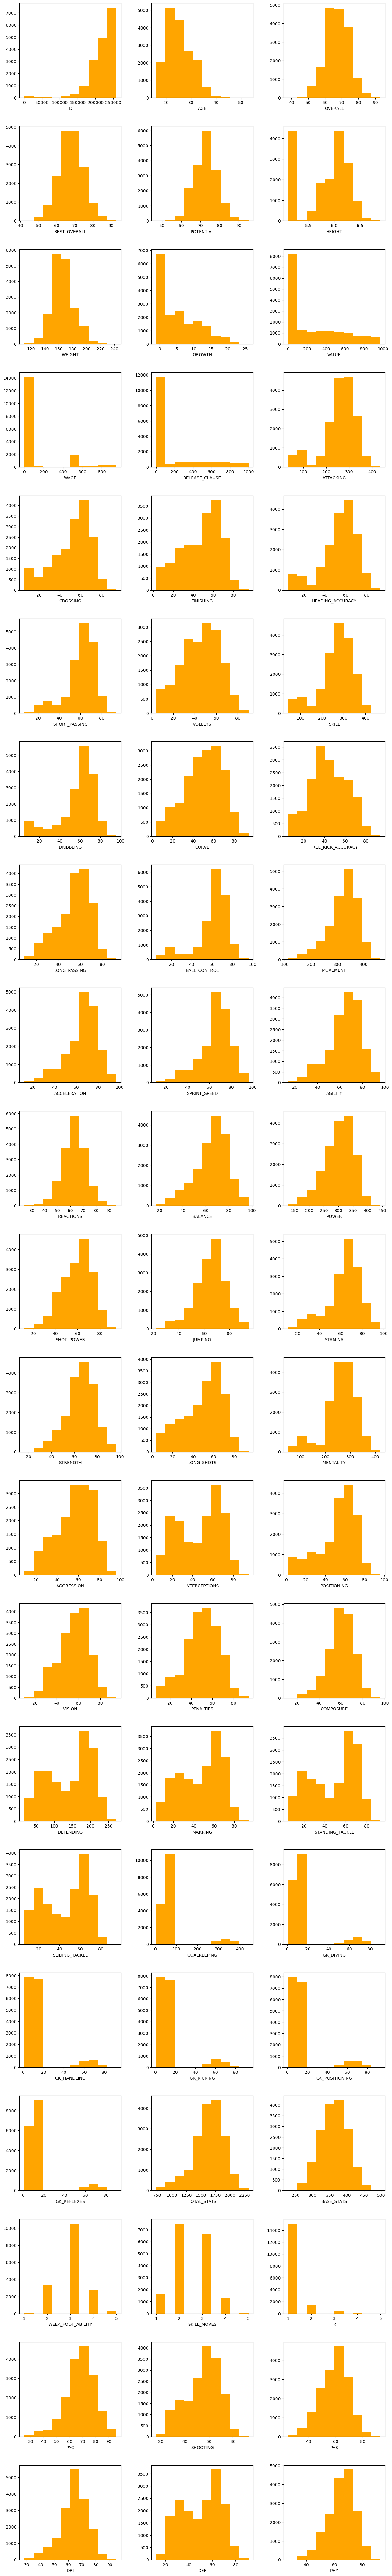

In [84]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each histogram in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    ax.hist(df_numeric[column], color='orange')
    ax.set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

#### Distributions

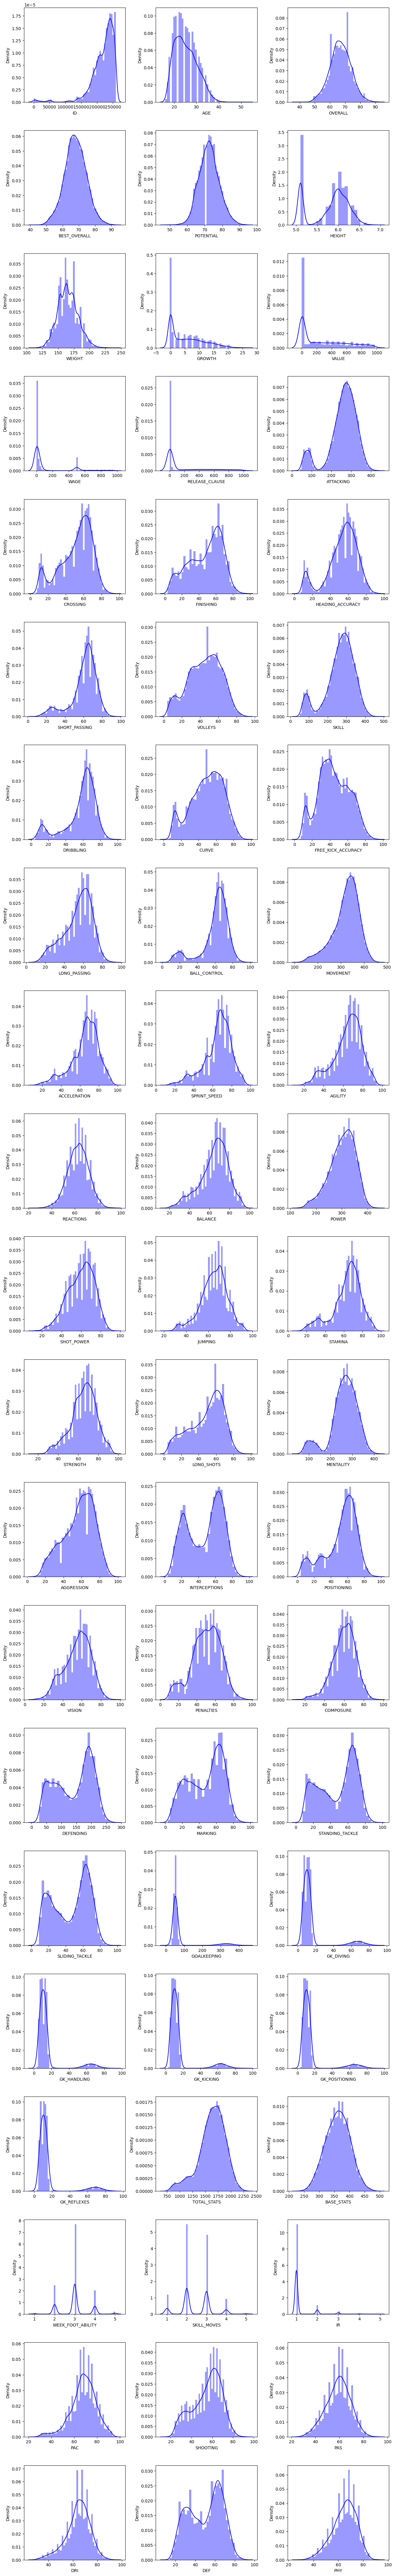

In [85]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric[column], ax=axes[row_idx, col_idx], kde=True, color='blue')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

#### boxplots

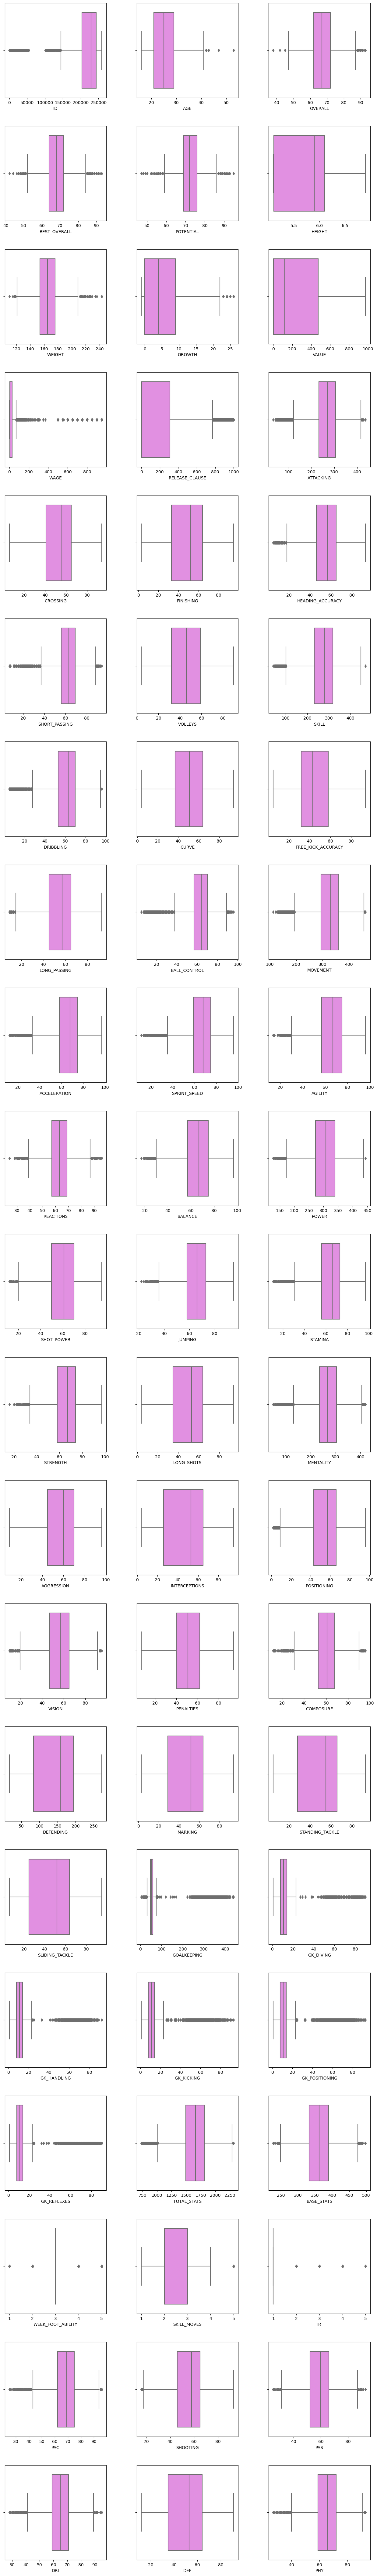

In [86]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

In [87]:
for column in df_numeric.columns:
    iqr = np.percentile(df_numeric[column],75) - np.percentile(df_numeric[column],25) # data['IC1'].quantile(0.75)
    iqr
    # define the limits
    upper_limit = np.percentile(df_numeric[column],75) + 1.5*iqr
    lower_limit = np.percentile(df_numeric[column],25) - 1.5*iqr
    print("\nFeature name: ", column," | Upper limit: ", upper_limit," | Lower limit: ", lower_limit)
    size_exclusion=len(df_numeric.loc[(df_numeric[column]>upper_limit) | (df_numeric[column]<lower_limit)])
    print("Number of exclusions would be ",size_exclusion)
    #print(X_num.where((X_num[X_num[column]]<lower_limit) and (X_num[X_num[column]]>lower_limit)).shape())


Feature name:  ID  | Upper limit:  303654.5  | Lower limit:  144338.5
Number of exclusions would be  556

Feature name:  AGE  | Upper limit:  41.0  | Lower limit:  9.0
Number of exclusions would be  13

Feature name:  OVERALL  | Upper limit:  87.0  | Lower limit:  47.0
Number of exclusions would be  32

Feature name:  BEST_OVERALL  | Upper limit:  84.0  | Lower limit:  52.0
Number of exclusions would be  251

Feature name:  POTENTIAL  | Upper limit:  86.5  | Lower limit:  58.5
Number of exclusions would be  298

Feature name:  HEIGHT  | Upper limit:  7.584999999999999  | Lower limit:  3.6250000000000013
Number of exclusions would be  0

Feature name:  WEIGHT  | Upper limit:  209.0  | Lower limit:  121.0
Number of exclusions would be  82

Feature name:  GROWTH  | Upper limit:  22.5  | Lower limit:  -13.5
Number of exclusions would be  51

Feature name:  VALUE  | Upper limit:  1182.7  | Lower limit:  -704.5
Number of exclusions would be  0

Feature name:  WAGE  | Upper limit:  70.5  | L

#### Correlations

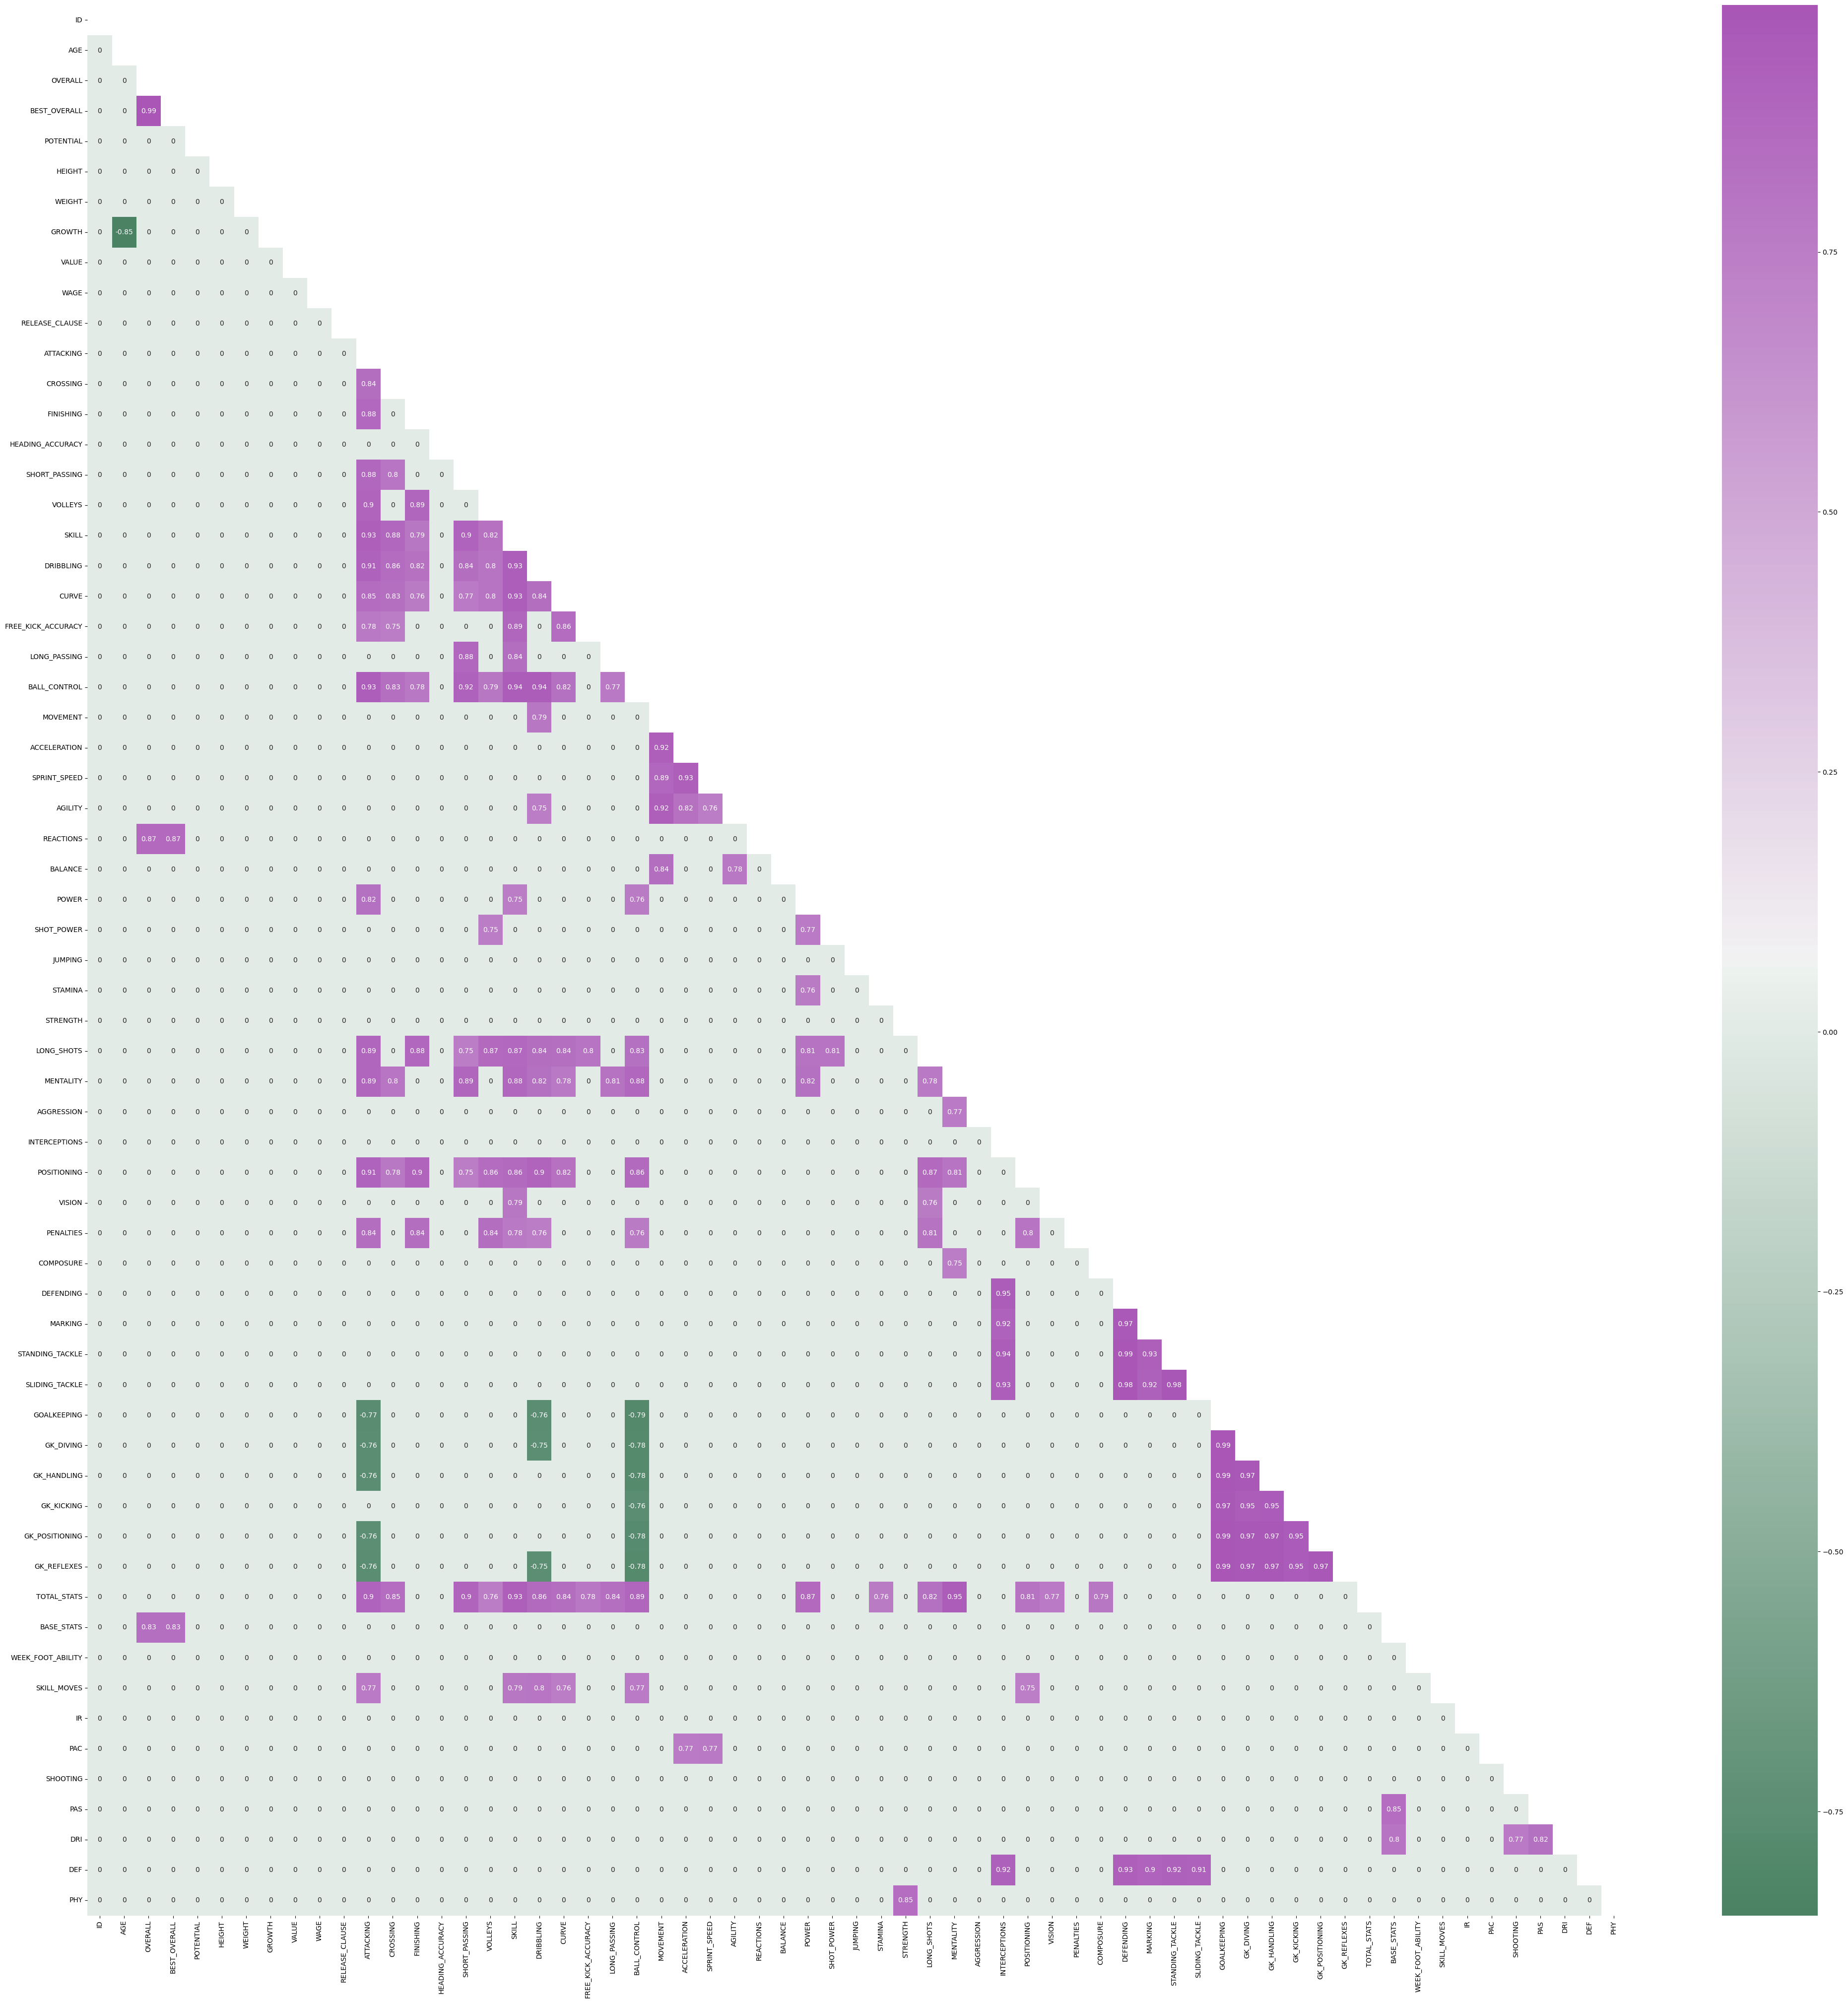

In [88]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric.corr()
correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50, 50))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

## Select variables relevant for the model
### Categoricals
    -NATIONALITY
    -BEST_POSITION
    -POTENTIAL
    -
### Numericals
    -AGE
    -OVERALL
    -VALUE
    -WAGE
    -IR


In [90]:
df_object_selected=df_object[['NATIONALITY','BEST_POSITION','FOOT']]#Renaming is not working
df_numeric_selected=df_numeric[['AGE','OVERALL','VALUE','WAGE','IR','POTENTIAL']]
df_MODEL=pd.concat([df_object_selected, df_numeric_selected], axis=1)
df_MODEL.reset_index()
df_MODEL.shape

(17125, 8)

# 03 Process / Transformations